In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [2]:
df = pd.read_csv('ee_mumu.csv')
df.head()

,# px_minus,py_minus,pz_minus,e_minus,px_plus,py_plus,pz_plus,e_plus,theta
0,-129.540,57.138,-479.536,500.0,129.540,-57.138,479.536,500.0,2.855
1,-287.273,-294.363,-284.296,500.0,287.273,294.363,284.296,500.0,2.176
2,86.632,149.810,-469.097,500.0,-86.632,-149.810,469.097,500.0,2.788
3,-90.400,398.861,287.641,500.0,90.400,-398.861,-287.641,500.0,0.958
4,-493.481,-48.867,-63.939,500.0,493.481,48.867,63.939,500.0,1.699


In [3]:
len(df)

500000

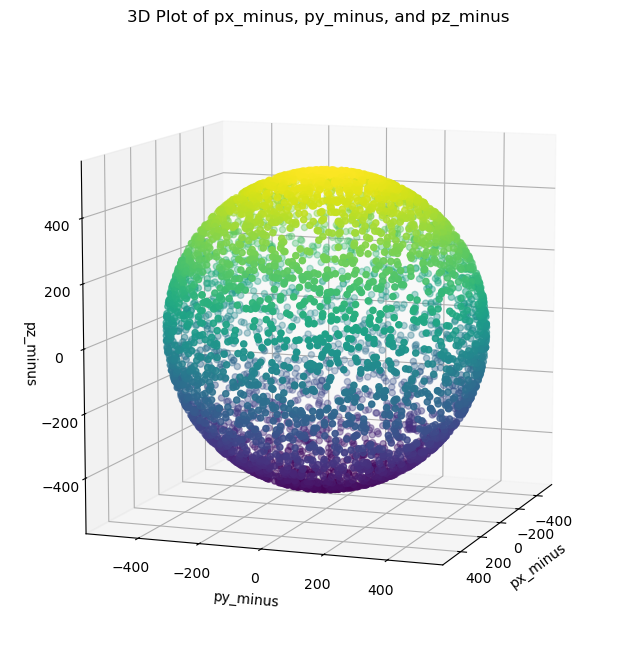

In [6]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.set_aspect('equal')

# Assuming 'px_minus', 'py_minus', and 'pz_minus' are columns in your DataFrame
data_size = np.size(df['# px_minus'])
random_indices = np.random.randint(0, data_size, 5000)
x = df['# px_minus'][random_indices]
y = df['py_minus'][random_indices]
z = df['pz_minus'][random_indices]

ax.scatter(x, y, z, c=z, cmap='viridis')  # Use colormap for better visualization

ax.set_xlabel('px_minus')
ax.set_ylabel('py_minus')
ax.set_zlabel('pz_minus')
ax.set_title('3D Plot of px_minus, py_minus, and pz_minus')

ax.view_init(elev=10, azim=20)

plt.show()

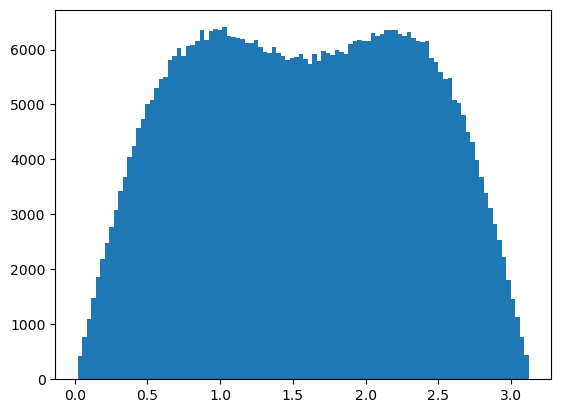

In [11]:
theta_map = lambda x, y, z : np.arccos(z/np.sqrt(x**2 + y**2 + z**2));
target = theta_map(df['# px_minus'], df['py_minus'], df['pz_minus']);
plt.hist(target, bins=100);

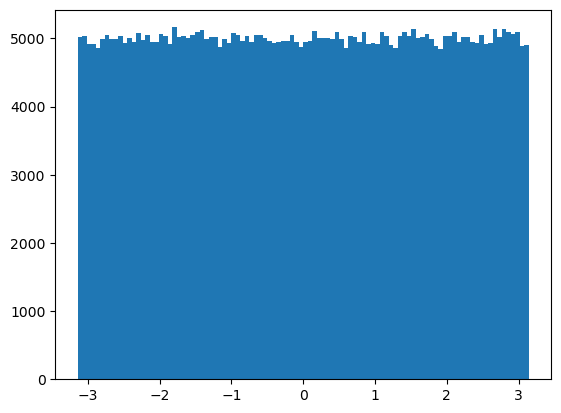

In [12]:
phi_map = lambda x, y : np.sign(y)*np.arccos(x/np.sqrt(x**2 + y**2));
target = phi_map(df['# px_minus'], df['py_minus']);
plt.hist(target, bins=100);

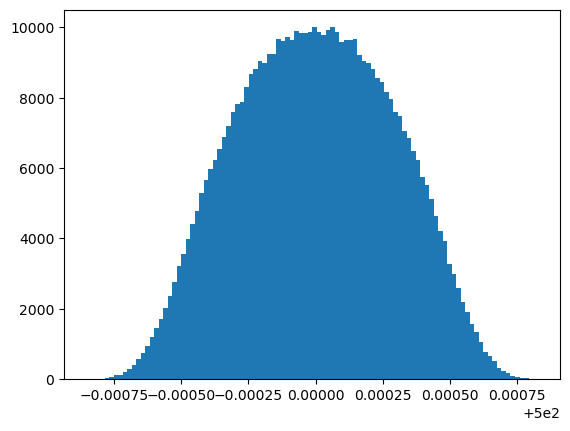

max r: 500.0008261403175, min r: 499.99914826127457


In [17]:
r_map = lambda x, y, z : np.sqrt(x**2 + y**2 + z**2);
target = r_map(df['# px_minus'], df['py_minus'], df['pz_minus']);
plt.hist(target, bins=100);
plt.show()

print(f'max r: {max(target)}, min r: {min(target)}')